#Problema

#Hipótese desta análise(opcional)

Marília é a cidade que mais empaca por causa de uma minoria de UBS

# Importando bibliotecas principais

In [0]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import random, decimal

%matplotlib inline



In [3]:
pip install bokeh

In [0]:
from bokeh.io import output_notebook
output_notebook()

# Importando e Explorando o dataset


In [0]:
df = pd.read_csv('dsUnidadeSaudeMunicipio.csv', parse_dates=['DAT_HORA_ATENDIMENTO','DAT_HORA_PREVISTA','DAT_HORA_ANAMNESE','DAT_ULTIMA_EVOLUCAO'],encoding="ISO-8859-1")

In [6]:
df.dtypes

DAT_HORA_ATENDIMENTO          datetime64[ns]
NOM_ENCAMINHAMENTO                    object
NOM_MODALIDADE_ATENDIMENTO            object
NOM_MUNICIPIO                         object
NOM_EQUIPE                            object
NOM_TIPO_CASO                         object
IDADE                                float64
COD_CID                               object
DAT_HORA_PREVISTA                     object
DAT_HORA_EVOLUCAO                     object
DAT_HORA_ANAMNESE             datetime64[ns]
DAT_HORA_ALTA                         object
QTD_EVOLUCAO                           int64
DAT_ULTIMA_EVOLUCAO           datetime64[ns]
NOM_UNIDADE_SAUDE                     object
dtype: object

## verificando escopos dos municípios

In [76]:
df["NOM_MUNICIPIO"].value_counts()

MARILIA/SP       21428
GARÇA/SP          2224
VERA CRUZ/SP      1798
TUPÃ/SP           1405
LUPÉRCIO/SP       1161
                 ...  
CLEMENTINA/SP        1
MOURÃO/SP            1
GUAIÇARA/SP          1
GUARAÇAÍ/SP          1
CAIABU/SP            1
Name: NOM_MUNICIPIO, Length: 169, dtype: int64

##escopos das unidades de saúde

In [77]:
df["NOM_UNIDADE_SAUDE"].value_counts()

UBS COSTA E SILVA MARILIA           892
UBS PLANALTO MARILIA                763
UBS CHICO MENDES MARILIA            724
UBS SANTA ANTONIETA MARILIA         653
UBS NOVA MARILIA                    617
                                   ... 
PAS VILA CALIFORNIA OSVALDO CRUZ      1
CENTRO ESPECILIDADES POMPEIA          1
SMS - FLORIDA PAULISTA                1
USF VILA GLORIA I ASSIS               1
APAE ADAMANTINA                       1
Name: NOM_UNIDADE_SAUDE, Length: 373, dtype: int64

# Limpeza e Tratamento de dados

In [0]:
import random

def getUnico(quantidade):
  if (quantidade == 1):
    return 1 + (random.randint(0, 200)/1000)
  else:
    return 0 + (random.randint(0, 200)/1000)

def getMarilia(nome):
  if (nome == 'MARILIA/SP'):
    return 1 + (random.randint(0, 200)/1000)
  else:
    return 0 + (random.randint(0, 200)/1000)

dfLimpo = df
dfLimpo['UNICO'] = df.apply(lambda row: getUnico(row.QTD_EVOLUCAO), axis=1)
dfLimpo['EHMARILIA'] = df.apply(lambda row: getMarilia(row.NOM_MUNICIPIO), axis=1)
#dfAgrupado = df.groupby('NOM_MUNICIPIO')['QTD_EVOLUCAO'].value_counts()
#dfMunicipio['NOME'] = {k: v for (k, v) in df.groupby('NOM_MUNICIPIO')}
#dfAgrupado['PROPORCAO'] = df.groupby('NOM_MUNICIPIO')['PROPORCAO'].sum()
#dfAgrupado['NOM_MUNICIPIO'] = dfAgrupado.apply(lambda row: getNomeMunicipio(row.NOM_MUNICIPIO), axis=1)



In [89]:
dfLimpo['NOM_MUNICIPIO'].value_counts()
dfLimpo.describe()

,IDADE,QTD_EVOLUCAO,UNICO,EHMARILIA
count,48449.000000,48449.000000,48449.000000,48449.000000
mean,49.976938,12.531136,0.041962,0.442280
std,21.240494,14.398104,0.200504,0.496662
min,0.607000,1.000000,0.000000,0.000000
25%,35.330287,5.000000,0.000000,0.000000
50%,52.902890,9.000000,0.000000,0.000000
75%,66.023438,16.000000,0.000000,1.000000
max,101.100150,276.000000,1.000000,1.000000


In [82]:
dfLimpo["NOM_EQUIPE"].value_counts()

AMBULATÓRIO SAÚDE MENTAL              11216
ORTOPEDIA E TRAUMATOLOGIA              4178
OFTALMOLOGIA                           4062
ENDOCRINOLOGIA E METABOLISMO           3422
CIRURGIA VASCULAR                      2396
NEUROLOGIA                             2385
ONCOLOGIA CLÍNICA                      2183
DERMATOLOGIA                           1921
REUMATOLOGIA                           1678
OTORRINOLARINGOLOGIA                   1576
ONCO-HEMATOLOGIA INFANTIL              1436
UROLOGIA                               1080
HEMATOLOGIA ADULTO                      956
GINECOLOGIA GERAL                       937
CARDIOLOGIA                             891
AMB PEDIATRIA ESPECIALIZADA             833
PNEUMOLOGIA                             831
CIRURGIA GERAL E DO TRAUMA              756
CIRURGIA PLÁSTICA                       734
OBSTETRÍCIA                             651
GASTROENTEROLOGIA - CLÍNICA MÉDICA      525
INFECTOLOGIA                            511
NEFROLOGIA                      

# Profiling


In [0]:
import pandas_profiling as pp
pp.ProfileReport(dfLimpo)

# Análises

## Plot do dataset puro


###Marilia x Unico x Municipio


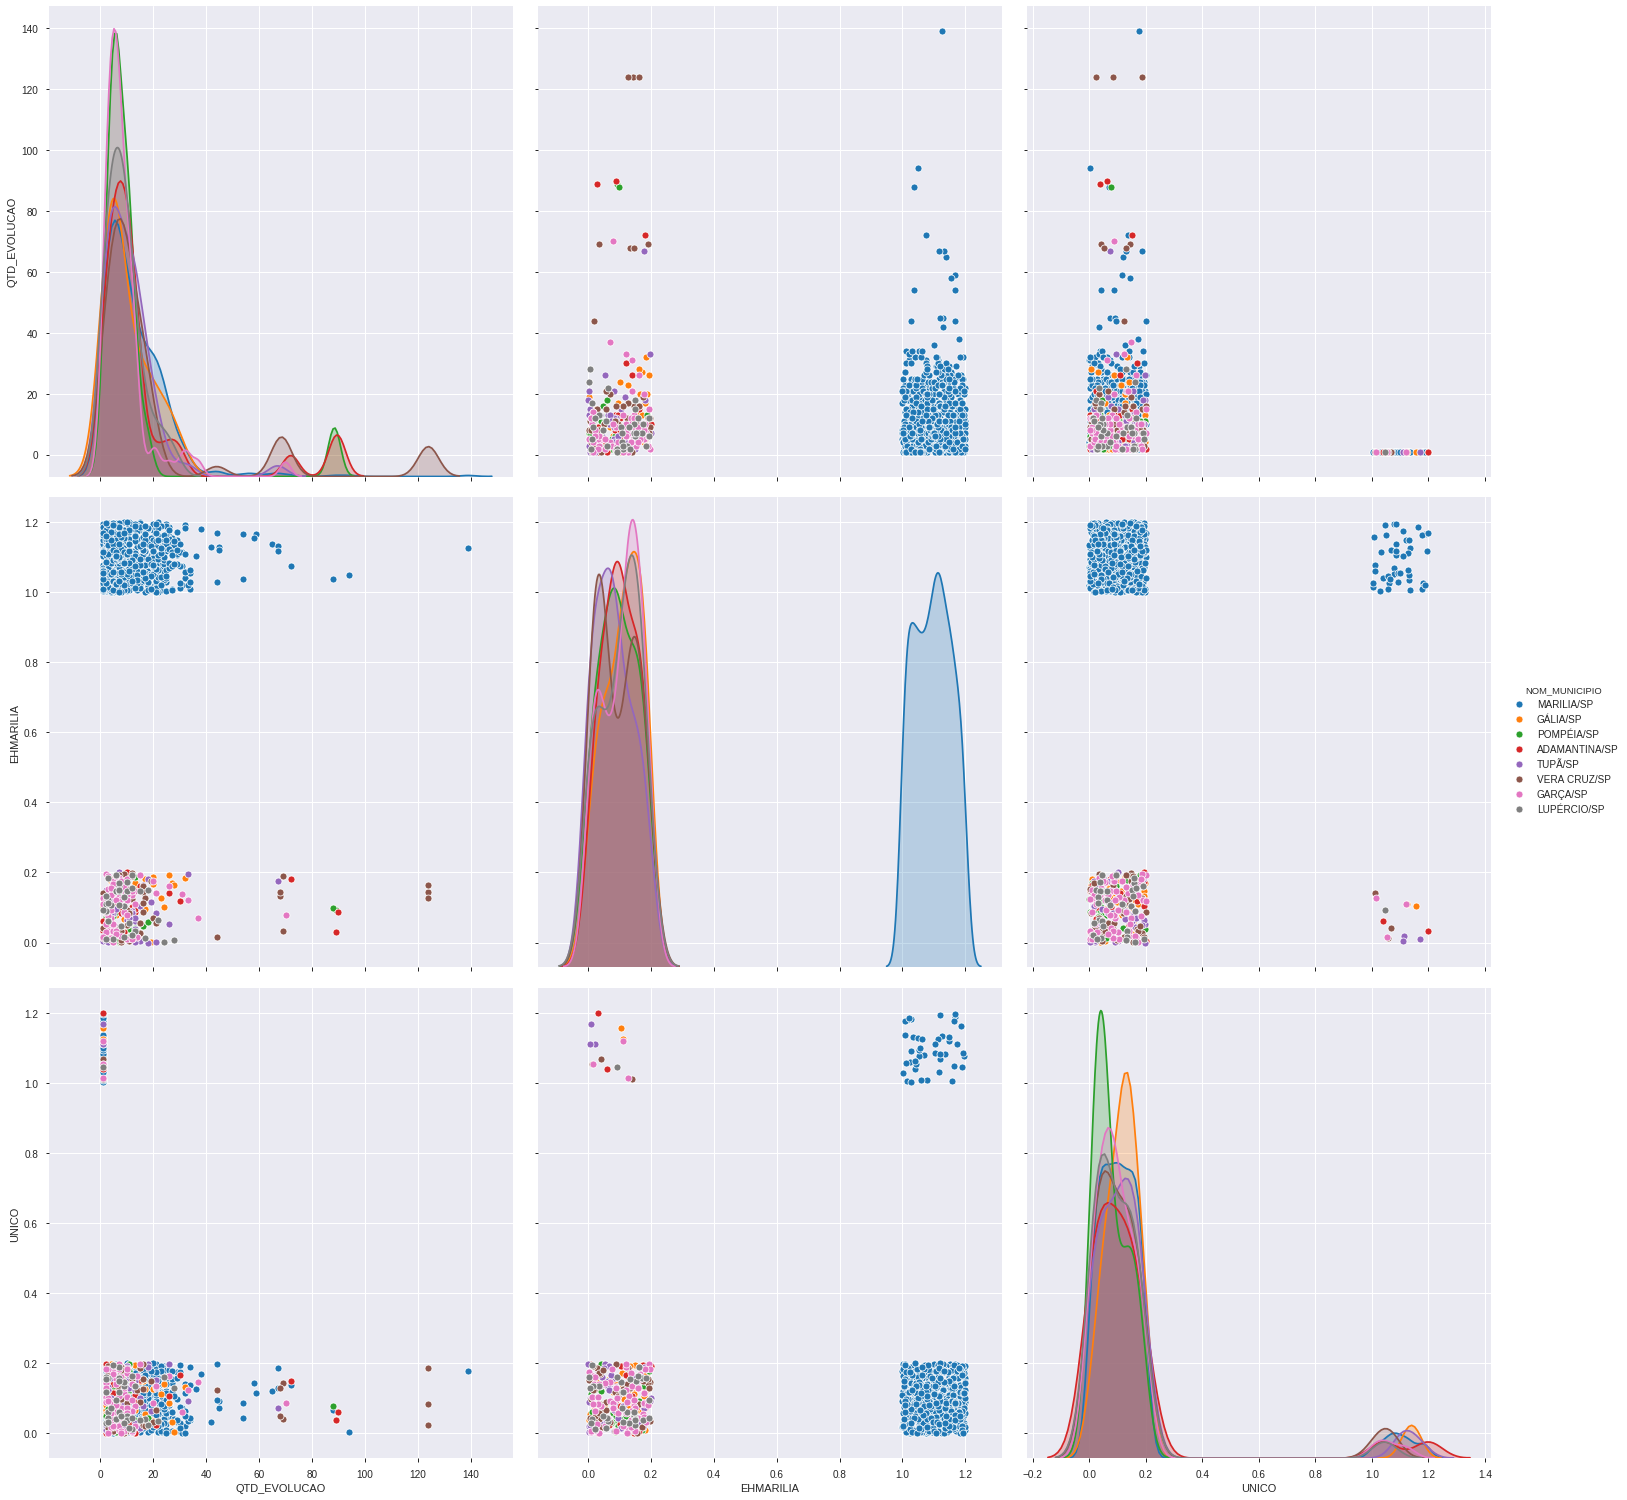

In [110]:
dfMunicipioUnico = dfLimpo[['QTD_EVOLUCAO','EHMARILIA', 'UNICO', 'NOM_MUNICIPIO']]
dfMunicipioUnico = dfMunicipioUnico[dfMunicipioUnico['NOM_MUNICIPIO'].map(dfMunicipioUnico['NOM_MUNICIPIO'].value_counts()) > 1000]
%matplotlib inline
dfMunicipioUnico
sb.pairplot(dfMunicipioUnico.sample(1000), hue='NOM_MUNICIPIO',height=7)
#pl.show()

In [0]:
%matplotlib inline
sb.pairplot(dfMunicipioUnico,hue='NOM_MODALIDADE_ATENDIMENTO',height=3)
pl.show()

In [0]:
dfCluster = dfLimpo[['IDADE','PROTOCOLO','NDURACAO']]
X = np.array(dfCluster)



###Somente UBS de Marilia

UBS COSTA E SILVA MARILIA      892
UBS PLANALTO MARILIA           763
UBS CHICO MENDES MARILIA       724
UBS SANTA ANTONIETA MARILIA    653
UBS NOVA MARILIA               617
UBS ALTO CAFEZAL MARILIA       550
CS II GALIA                    542
UBS CASTELO BRANCO MARILIA     522
CS II VERA CRUZ                510
Name: NOM_UNIDADE_SAUDE, dtype: int64

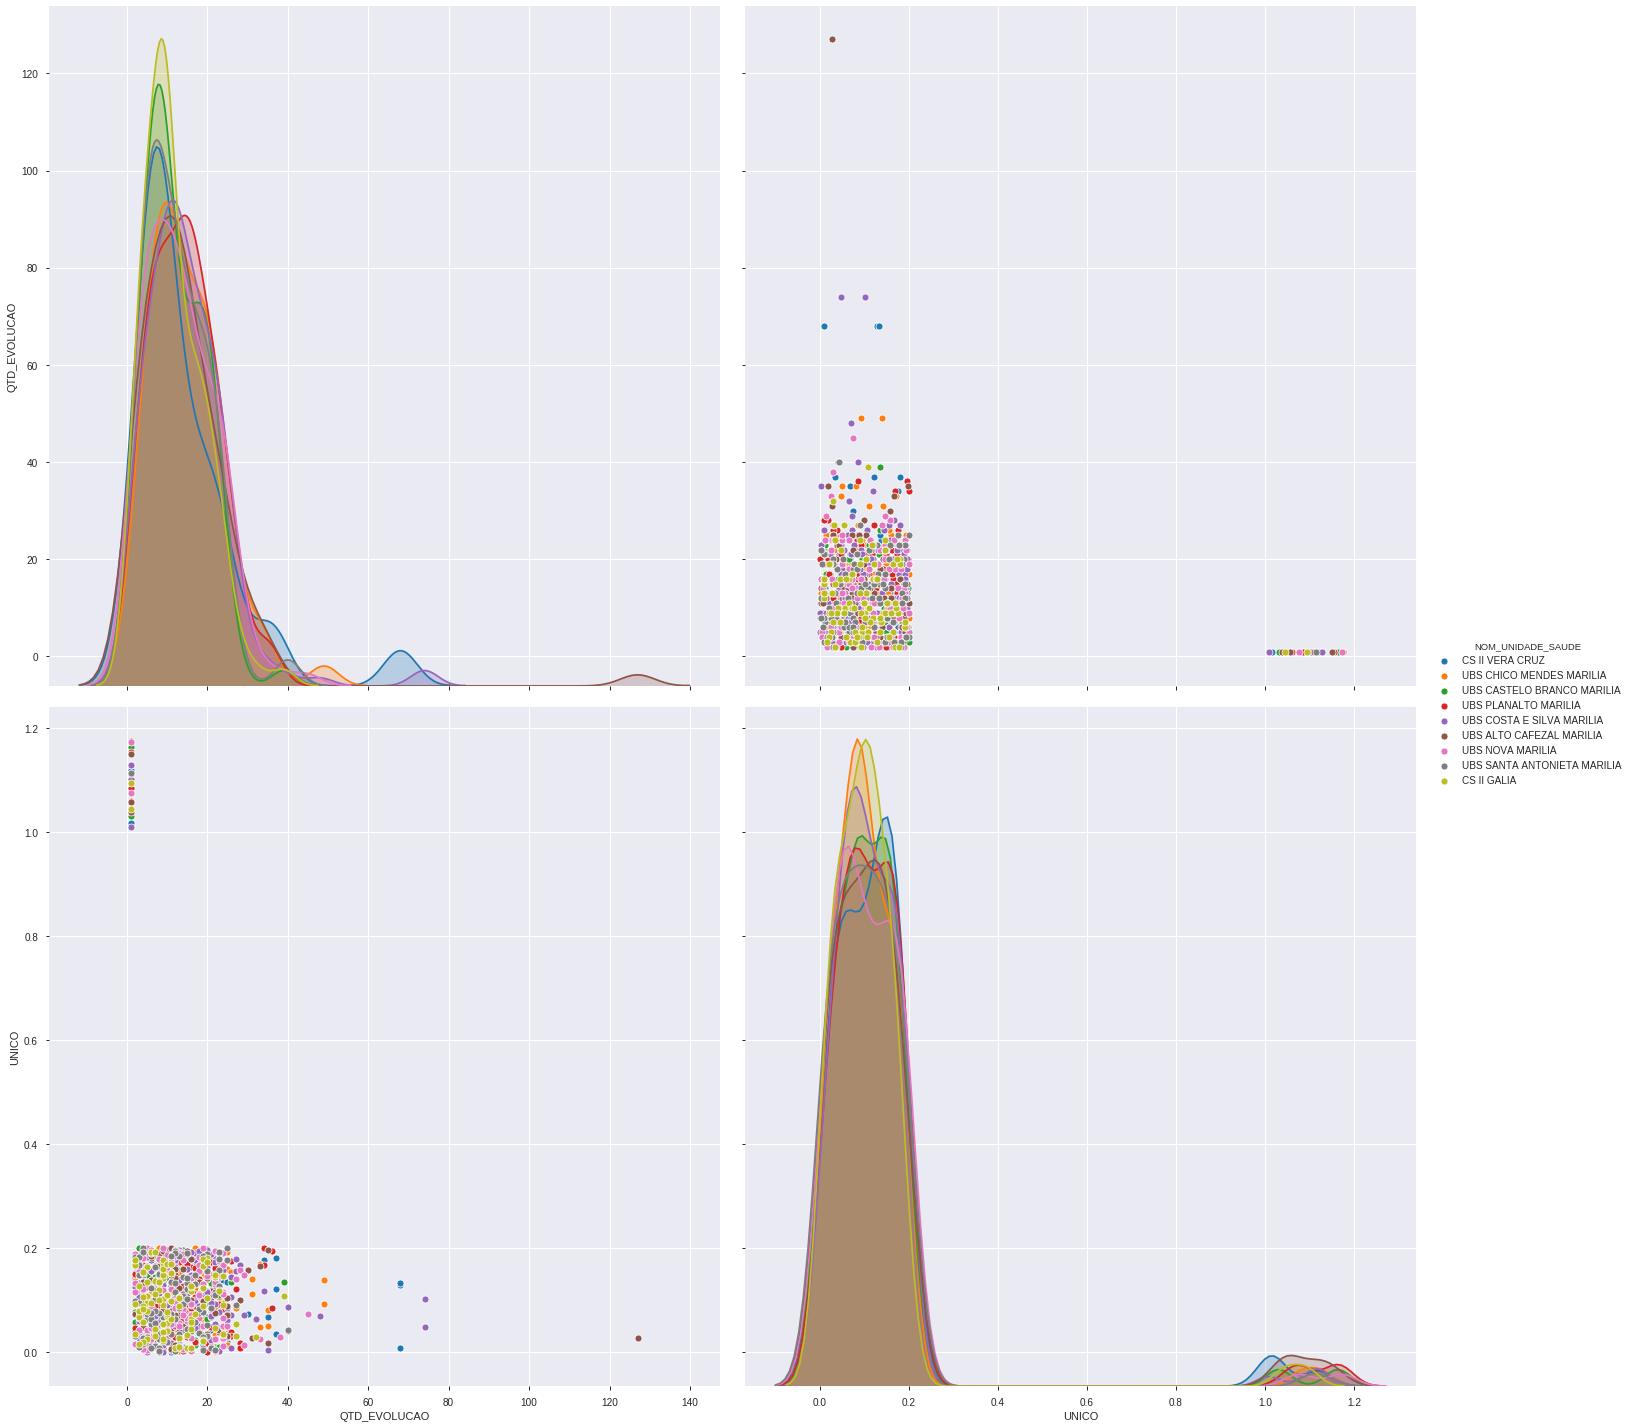

In [124]:
dfMarilia = dfLimpo[['QTD_EVOLUCAO', 'UNICO', 'NOM_UNIDADE_SAUDE','NOM_MUNICIPIO']]
dfMarilia = dfMarilia[dfMarilia['NOM_UNIDADE_SAUDE'].map(dfMarilia['NOM_UNIDADE_SAUDE'].value_counts()) > 500]
#dfMarilia = dfMarilia[dfMarilia['NOM_MUNICIPIO']=='MARILIA/SP']
dfMarilia = dfMarilia.drop('NOM_MUNICIPIO',axis=1)

dfMarilia
sb.pairplot(dfMarilia.sample(1000), hue='NOM_UNIDADE_SAUDE',height=10)
dfMarilia['NOM_UNIDADE_SAUDE'].value_counts()
#pl.show()

## Clusterização

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [0]:
dfCluster

In [0]:
kmeans.fit(X)

In [0]:
kmeans.labels_

In [0]:
dfCluster['cluster'] = kmeans.labels_

###Plotando o resultado da clusterização

In [0]:
sb.pairplot(dfCluster,hue='cluster')

##Regressão

In [0]:
dfLimpo

In [130]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dfRegressao = dfLimpo[['EHMARILIA','UNICO']]

#dfRegressao = pd.concat([dfRegressao, pd.get_dummies(dfRegressao['NOM_MODALIDADE_ATENDIMENTO'])], axis=1)


dfRegressao





,EHMARILIA,UNICO
0,0.081,0.189
1,1.044,0.020
2,1.200,0.189
3,0.057,0.105
4,1.117,0.148
...,...,...
48444,0.016,0.122
48445,0.021,0.043
48446,0.182,0.064
48447,0.006,0.148


In [0]:
#dfRegressao = dfRegressao.drop('NOM_MODALIDADE_ATENDIMENTO', axis=1) 

In [131]:
# passando os valores de x e y como Dataframes
X = dfRegressao[['EHMARILIA']]
Y = dfRegressao[['UNICO']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Teste predicao regressao

In [136]:
teste = [[1]]

model.predict(teste)

array([[0.13956553]])

###Plot regressao

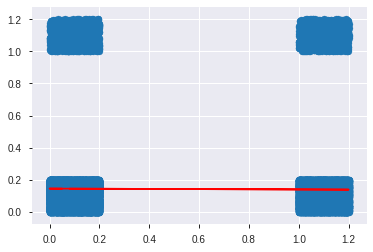

In [137]:
%matplotlib inline
# passando os valores de x e y como Dataframes
dfRegressaoPlot = dfRegressao
X = dfRegressaoPlot[['EHMARILIA']]
Y = dfRegressaoPlot[['UNICO']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
pl.scatter(X, Y)


pl.plot(X, Y_pred, color='red')
pl.show()

###Correção dos OUTLIERS

In [139]:
%matplotlib inline
# passando os valores de x e y como Dataframes

dfRegressaoCorrigido = dfLimpo[['EHMARILIA','QTD_EVOLUCAO','UNICO']]

dfRegressaoPlot = dfRegressaoCorrigido[dfRegressaoCorrigido['UNICO']==0]

#dfRegressaoCorrigido = pd.concat([dfRegressaoCorrigido, pd.get_dummies(dfRegressaoCorrigido['NOM_MODALIDADE_ATENDIMENTO'])], axis=1)

#dfRegressaoPlot = dfRegressaoCorrigido[dfRegressaoCorrigido.QTD_EVOLUCAO>2]

dfRegressaoPlot

,EHMARILIA,QTD_EVOLUCAO,UNICO
20,0.051,5,0.0
100,0.184,17,0.0
777,0.165,4,0.0
1126,0.167,3,0.0
1264,0.195,25,0.0
...,...,...,...
47833,1.010,9,0.0
47850,1.147,15,0.0
47880,1.029,10,0.0
47900,0.052,17,0.0


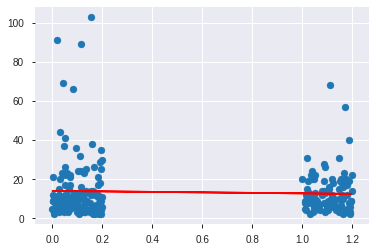

In [140]:

X = dfRegressaoPlot[['EHMARILIA']]
Y = dfRegressaoPlot[['QTD_EVOLUCAO']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
pl.scatter(X, Y)


pl.plot(X, Y_pred, color='red')
pl.show()

#Conclusão

Foi CONSTATADO que Marília é a cidade que mais empaca com uma incidência grande, porém proporcional ao tamanho e quantidade populacional.